In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f'shape of train data: {x_train.shape, y_train.shape}, shape of test data: {x_test.shape, y_test.shape}')

shape of train data: ((60000, 28, 28), (60000,)), shape of test data: ((10000, 28, 28), (10000,))


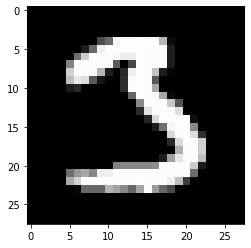

In [4]:
plt.imshow(x_train[11111],cmap='gray')

In [5]:
pd.DataFrame(y_train).value_counts()/(y_train.shape[0])

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64

In [6]:
#Scaling
x_train = x_train/255
#x_test = x_test/255

In [8]:
x_train.shape

(60000, 28, 28)

In [7]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392,activation='relu'))
model.add(Dense(249,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(59,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 392)               307720    
                                                                 
 dense_6 (Dense)             (None, 249)               97857     
                                                                 
 dense_7 (Dense)             (None, 128)               32000     
                                                                 
 dense_8 (Dense)             (None, 59)                7611      
                                                                 
 dense_9 (Dense)             (None, 10)                600       
                                                                 
Total params: 445,788
Trainable params: 445,788
Non-tr

In [11]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [12]:
model.fit(x_train,y_train,epochs=10,batch_size=500,validation_split=0.1)

Epoch 1/10
108/108 [==============================] - 4s 24ms/step - loss: 2.1804 - accuracy: 0.2586 - val_loss: 2.0007 - val_accuracy: 0.5023
Epoch 2/10
108/108 [==============================] - 2s 17ms/step - loss: 1.7503 - accuracy: 0.6218 - val_loss: 1.3838 - val_accuracy: 0.7497
Epoch 3/10
108/108 [==============================] - 2s 16ms/step - loss: 1.1161 - accuracy: 0.7601 - val_loss: 0.8005 - val_accuracy: 0.8262
Epoch 4/10
108/108 [==============================] - 2s 17ms/step - loss: 0.7410 - accuracy: 0.8098 - val_loss: 0.5658 - val_accuracy: 0.8638
Epoch 5/10
108/108 [==============================] - 2s 17ms/step - loss: 0.5811 - accuracy: 0.8442 - val_loss: 0.4508 - val_accuracy: 0.8893
Epoch 6/10
108/108 [==============================] - 2s 17ms/step - loss: 0.4924 - accuracy: 0.8667 - val_loss: 0.3835 - val_accuracy: 0.9037
Epoch 7/10
108/108 [==============================] - 2s 18ms/step - loss: 0.4359 - accuracy: 0.8801 - val_loss: 0.3410 - val_accuracy: 0.9125

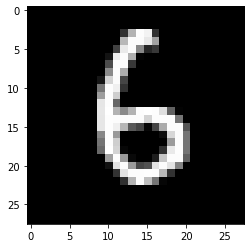

In [16]:
plt.imshow(x_test[21],cmap='gray')

In [20]:
x_test[21].reshape(1,28,28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          49, 180, 253, 244,  50,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         184, 252, 252, 232, 164,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66,
         234, 252, 136,  38,  56,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [22]:
np.argmax(model.predict(x_test[21].reshape(1,28,28)))

1/1 [==============================] - 0s 40ms/step


6